In [1]:
import pandas as pd

# Import de donnée 

In [3]:
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", sep = ",")
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
nb_dpt = data.groupby("Department Name").count()
nb_dpt

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Class Name
Department Name,,,,,,,,,,
Bottoms,3799,3799,3799,3184,3662,3799,3799,3799,3799,3799
Dresses,6319,6319,6319,5372,6145,6319,6319,6319,6319,6319
Intimate,1735,1735,1735,1408,1653,1735,1735,1735,1735,1735
Jackets,1032,1032,1032,879,1002,1032,1032,1032,1032,1032
Tops,10468,10468,10468,8713,10048,10468,10468,10468,10468,10468
Trend,119,119,119,107,118,119,119,119,119,119


In [5]:
#supprimer les valeurs manquantes
data = data.dropna()


In [7]:
# Nombre de lignes 
print("Nombre de lignes : ", data.shape[0])
# Nombre de colonnes
print("Nombre de variables : ", data.shape[1])


Nombre de lignes :  19662
Nombre de variables :  11


In [9]:
# Description des variables
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               19662 non-null  int64 
 1   Clothing ID              19662 non-null  int64 
 2   Age                      19662 non-null  int64 
 3   Title                    19662 non-null  object
 4   Review Text              19662 non-null  object
 5   Rating                   19662 non-null  int64 
 6   Recommended IND          19662 non-null  int64 
 7   Positive Feedback Count  19662 non-null  int64 
 8   Division Name            19662 non-null  object
 9   Department Name          19662 non-null  object
 10  Class Name               19662 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.8+ MB


In [10]:
# Describe permet d'avoir un aperçu des variables quantitatives

data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000
mean,11755.260655,921.297274,43.260808,4.183145,0.818177,2.652477
std,6772.063092,200.227528,12.258122,1.112224,0.385708,5.834285
min,2.000000,1.000000,18.000000,1.000000,0.000000,0.000000
25%,5888.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11749.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17624.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


L'age moyen des clientes est de 43 ans.

In [13]:
# Information sur les variables qualitatives (non numériques)
data["Division Name"].unique()



array(['General', 'General Petite', 'Initmates'], dtype=object)

In [14]:
data["Department Name"].unique()

array(['Dresses', 'Bottoms', 'Tops', 'Intimate', 'Jackets', 'Trend'],
      dtype=object)

In [15]:
data["Class Name"].unique()

array(['Dresses', 'Pants', 'Blouses', 'Knits', 'Intimates', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Shorts', 'Legwear', 'Layering',
       'Casual bottoms', 'Chemises'], dtype=object)

In [16]:
# Departement Name et Class Name sont des variables qualitatives ordonnées
data.groupby("Department Name")["Class Name"].unique()

Department Name
Bottoms        [Pants, Skirts, Jeans, Shorts, Casual bottoms]
Dresses                                             [Dresses]
Intimate    [Intimates, Lounge, Sleep, Swim, Legwear, Laye...
Jackets                                  [Outerwear, Jackets]
Tops                   [Blouses, Knits, Sweaters, Fine gauge]
Trend                                                 [Trend]
Name: Class Name, dtype: object

<Axes: title={'center': "Nombre d'avis par département"}, xlabel='Département', ylabel="Nombre d'avis">

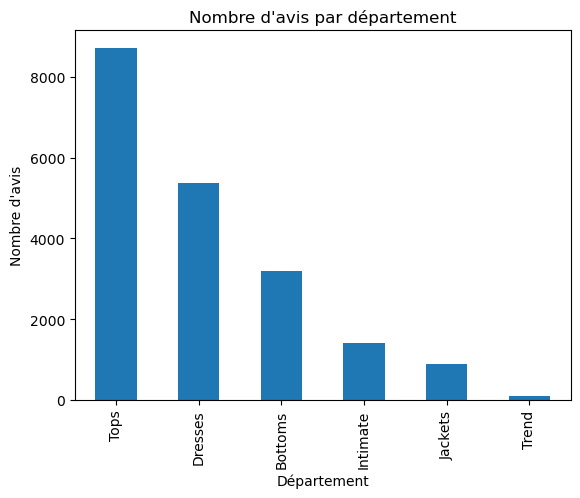

In [21]:
# Histogramme du nombre d'avis department name
data["Department Name"].value_counts().plot(kind = "bar",
                                             title = "Nombre d'avis par département",
                                               xlabel="Département",
                                                 ylabel="Nombre d'avis")



<Axes: title={'center': 'Age'}, xlabel='Department Name'>

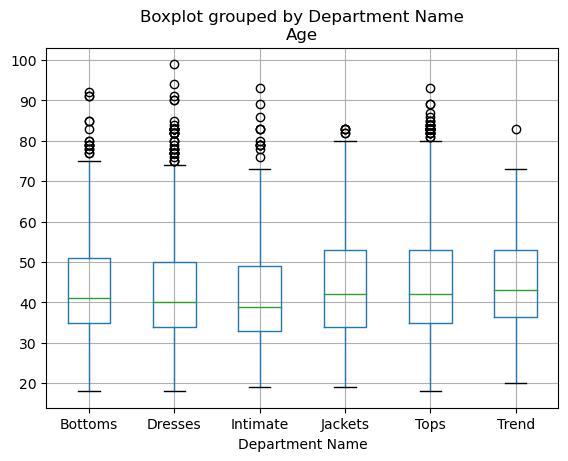

In [25]:
# Boxplot age par departement
data.boxplot(column = "Age", by = "Department Name")

In [27]:
# Note moyenne par departement
data.groupby("Department Name")["Rating"].mean()

Department Name
Bottoms     4.287688
Dresses     4.137032
Intimate    4.257812
Jackets     4.270762
Tops        4.156433
Trend       3.859813
Name: Rating, dtype: float64